<a href="https://colab.research.google.com/github/errpv78/Detecting_Sentiments_of_Quote/blob/master/Simple_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connecting with google drive for saving the model
Dataset used: Imdb movie reviews

Downloading dataset into Google drive directly from kaggle and importing data: https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a

In [45]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [46]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [47]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


In [48]:
!ls

best_model_state.bin  kaggle.json  training.1600000.processed.noemoticon.csv


In [ ]:
# Importing necessary packages
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
%matplotlib inline

In [ ]:
# Checking if GPU available
physical_devices = tf.config.experimental.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [ ]:
# Loading the imdb dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 10000)

In [ ]:
# Text is already encoded
print(x_train[0], y_train[0])
class_names = ['Negative', 'Positive']

# Downloading the word to index dictionary
word_index = imdb.get_word_index()
print(word_index['the'])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32] 1
1


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [ ]:
# Creating index to word dictionary
reverse_word_idx = dict((value, key) for key, value in word_index.items())

# Decoding function to get review from encoded review
def decode_review(s):
    rev = ''
    for i in s:
        rev+=reverse_word_idx[i]
        rev+=' '
    return rev[:-1]

print(decode_review(x_train[0]))
print(len(x_train[0]))    

the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have tw

In [ ]:
# Padding examples with small length to make equal length examples of 256
# pad_sequences: 
"""This function transforms a list (of length num_samples) of sequences (lists of integers) into
 a 2D Numpy array of shape (num_samples, num_timesteps). num_timesteps is either the maxlen 
 argument if provided, or the length of the longest sequence in the list.
Sequences that are shorter than num_timesteps are padded with value until they are num_timesteps
 long.
Sequences longer than num_timesteps are truncated so that they fit the desired length.
The position where padding or truncation happens is determined by the arguments padding and
 truncating, respectively. Pre-padding or removing values from the beginning of the sequence is
  the default."""
m = 0
for i in x_train:
    m=max(m, len(i))
for i in x_test:
    m=max(m, len(i))
print('Initial max length', m)

x_train = pad_sequences(x_train, value = word_index['the'], padding = 'post', maxlen = 256, truncating='post')
x_test = pad_sequences(x_test, value = word_index['the'], padding = 'post', maxlen = 256, truncating='post')

m = 0
for i in x_train:
    m=max(m, len(i))
for i in x_test:
    m=max(m, len(i))    
print(m)

Initial max length 2494
256


In [43]:
# Defining the model 
# Embedding: Turns positive integers (indexes) into dense vectors of fixed size. This layer can
# only be used as the first layer in a model.
# Global average polling 1D: Global average pooling operation for temporal data.

def create_model():
    model = Sequential([
        Embedding(10000, 64),  # 10000: size of vocabulary; 64: output dimension of embedding.
        GlobalAveragePooling1D(),  
        Dense(16, activation = 'relu'),  # For inputting 16 dimension word embeddings
        Dense(1, activation = 'sigmoid') # For outputting either as positive or negative
    ])

    model.compile(
        loss = 'binary_crossentropy', 
        optimizer = 'adam',
        metrics = ['accuracy']
    )

    model.summary()
    return model

model = create_model()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 641,057
Trainable params: 641,057
Non-trainable params: 0
_________________________________________________________________


In [49]:
checkpoint_path = "training_simple_nn/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


h = model.fit(
    x_train, y_train,
    validation_split = 0.2,
    epochs=20,
    callbacks = [cp_callback]  # Passing callback to training
)

Epoch 1/20
625/625 [==============================] - ETA: 0s - loss: 0.5339 - accuracy: 0.7480
Epoch 00001: saving model to training_simple_nn/cp.ckpt
625/625 [==============================] - 5s 8ms/step - loss: 0.5339 - accuracy: 0.7480 - val_loss: 0.3489 - val_accuracy: 0.8538
Epoch 2/20
623/625 [============================>.] - ETA: 0s - loss: 0.2687 - accuracy: 0.8961
Epoch 00002: saving model to training_simple_nn/cp.ckpt
625/625 [==============================] - 5s 8ms/step - loss: 0.2691 - accuracy: 0.8960 - val_loss: 0.2993 - val_accuracy: 0.8778
Epoch 3/20
625/625 [==============================] - ETA: 0s - loss: 0.2044 - accuracy: 0.9232
Epoch 00003: saving model to training_simple_nn/cp.ckpt
625/625 [==============================] - 5s 8ms/step - loss: 0.2044 - accuracy: 0.9232 - val_loss: 0.2964 - val_accuracy: 0.8822
Epoch 4/20
625/625 [==============================] - ETA: 0s - loss: 0.1674 - accuracy: 0.9398
Epoch 00004: saving model to training_simple_nn/cp.ckpt

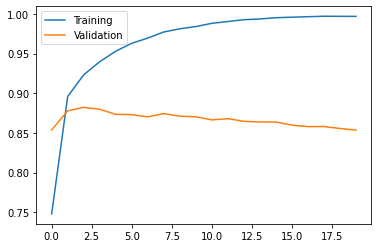

In [50]:
plt.plot(range(20), h.history['accuracy'], label='Training')
plt.plot(range(20), h.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()

In [51]:
!ls # Model saved in training_simple_nn
# Next download the model from drive and load it in predict.ipynb

best_model_state.bin  training.1600000.processed.noemoticon.csv
kaggle.json	      training_simple_nn
